In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
numb_x_src_path = '../../Dataset/MixedDataSet.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [4]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-59022]

In [5]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [6]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array
ros = SMOTE()
X_N, y = ros.fit_resample(X_N, y)

In [7]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [8]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [9]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

Training data score: 1.0
Test data score: 0.9555555555555556


In [38]:
NPH = 32
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=30, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/30
6/6 [==============================] - 1s 37ms/step - loss: 373.5780 - accuracy: 0.6425 - val_loss: 82.2565 - val_accuracy: 0.6000
Epoch 2/30
6/6 [==============================] - 0s 9ms/step - loss: 164.4436 - accuracy: 0.6480 - val_loss: 202.5929 - val_accuracy: 0.5333
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 128.1325 - accuracy: 0.5866 - val_loss: 85.8812 - val_accuracy: 0.6889
Epoch 4/30
6/6 [==============================] - 0s 8ms/step - loss: 78.4510 - accuracy: 0.7430 - val_loss: 73.0818 - val_accuracy: 0.7333
Epoch 5/30
6/6 [==============================] - 0s 8ms/step - loss: 68.6479 - accuracy: 0.7654 - val_loss: 94.2829 - val_accuracy: 0.6889
Epoch 6/30
6/6 [==============================] - 0s 8ms/step - loss: 139.3185 - accuracy: 0.7542 - val_loss: 49.3725 - val_accuracy: 0.6889
Epoch 7/30
6/6 [==============================] - 0s 8ms/step - loss: 20.6080 - accuracy: 0.8827 - val_loss: 55.0486 - val_accuracy: 0.8000
Epoch 8/30
6/6

In [11]:
# numb_model.summary()
# numb_model.save("scaled_model.h5")

In [39]:
for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
    print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 1 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptro

In [43]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

2/2 [==============================] - 0s 4ms/step - loss: 5.9820 - accuracy: 0.9778
0.9777777791023254


c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


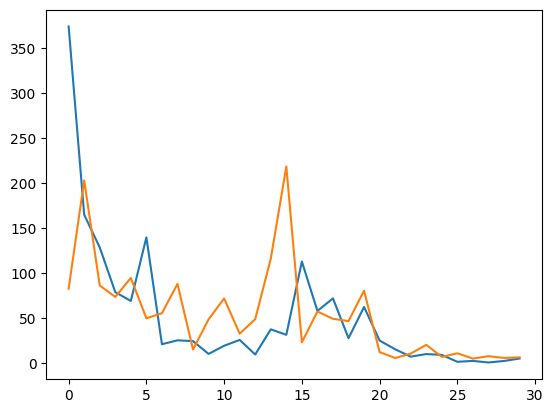

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

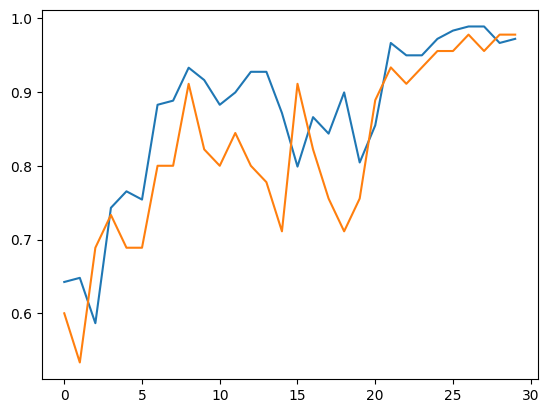

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])